Hay dos aproximaciones para tratar los datos faltantes:
* Eliminacion de valores faltantes
* Imputación de valores faltantes

  La eliminación de valores faltantes asume que los valores faltantes están perdidos
    completamente al azar (MCAR). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar sesgos en los
    análisis y modelos subsecuentes.

Primero, debemos observar el número total de observaciones y variables que tiene tu conjunto de datos.

In [5]:
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.shape

(768, 9)

In [14]:
columnas_con_faltantes_ocultos = [
    "Glucose",        # Glucosa
    "BloodPressure",  # Presión arterial
    "SkinThickness",  # Grosor de piel
    "Insulin",        # Insulina
    "BMI"             # Índice de masa corporal
]


La base diabetes usa 0 como un valor faltante en varias columnas biomédicas, lo cual es incorrecto estadísticamente, porque 0 en glucosa o presión arterial no es válido fisiológicamente.

In [26]:
import numpy as np
import pandas as pd

# Reemplaza 0s por NaN en las columnas relevantes
diabetes[columnas_con_faltantes_ocultos] = diabetes[columnas_con_faltantes_ocultos].replace(0, np.nan)

# Confirmamos cuántos valores faltantes hay ahora por columna
diabetes.isna().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Pairwise Deletion (Eliminación por pares)

Calcula estadísticas solo con las filas que tienen datos en las columnas involucradas, sin eliminar completamente la fila si hay datos faltantes en otras columnas.
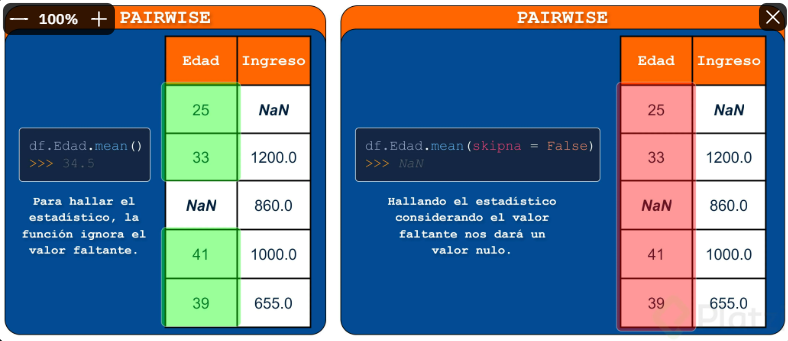
Ejemplo práctico:
Supongamos que estás calculando la correlación entre 'Glucose' y 'Insulin'. En lugar de eliminar toda la fila por un NaN en otra columna, se usarán las filas que tienen datos en esas dos columnas, aunque falten valores en otras.



In [27]:
diabetes['Glucose'].mean()


np.float64(121.6867627785059)

In [29]:
# Total de elementos (incluyendo NaN)
diabetes['Glucose'].size, 

(768,)

In [31]:
# Solo los que NO tienen NaN (los válidos para cálculos)
diabetes['Glucose'].count()

np.int64(763)

In [21]:
# Cálculo que ignora automáticamente los NaN
diabetes["Glucose"].mean()              # omite NaN por defecto
diabetes["Glucose"].mean(skipna=False)  # incluye NaN y da como resultado NaN


np.float64(nan)

In [17]:
# Elimina filas que tienen al menos un NaN en las columnas seleccionadas
diabetes_cleaned = diabetes.dropna(subset=columnas_con_faltantes_ocultos, how='any')

# Confirmamos nuevo tamaño
diabetes_cleaned.shape


(392, 9)

In [16]:
# Cálculo que ignora automáticamente los NaN
diabetes["Glucose"].mean()              # omite NaN por defecto
diabetes["Glucose"].mean(skipna=False)  # incluye NaN y da como resultado NaN


np.float64(nan)

In [18]:
print("Original:", diabetes.shape)
print("Después de eliminación:", diabetes_cleaned.shape)


Original: (768, 9)
Después de eliminación: (392, 9)


In [8]:
(
   diabetes
   .Insulin
   .mean()
)

np.float64(79.79947916666667)

In [11]:
diabetes.Insulin.size, diabetes.Insulin.count()

(768, np.int64(768))

In [12]:
diabetes.mean(skipna = False)

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

## Listwise Deletion or Complete Case

También llamada Complete Case Analysis, elimina toda la fila si al menos una de las columnas especificadas tiene valores faltantes (NaN)


Con base a 1 columna:

In [32]:
# Elimina filas donde 'Glucose' o 'Insulin' tengan NaN
diabetes.dropna(subset=["Glucose"], how="any")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


Con base a dos o más variables:


In [33]:
diabetes.dropna(subset=['Glucose', 'BloodPressure'], how='any').shape


(728, 9)

Representación grafica:

<Axes: >

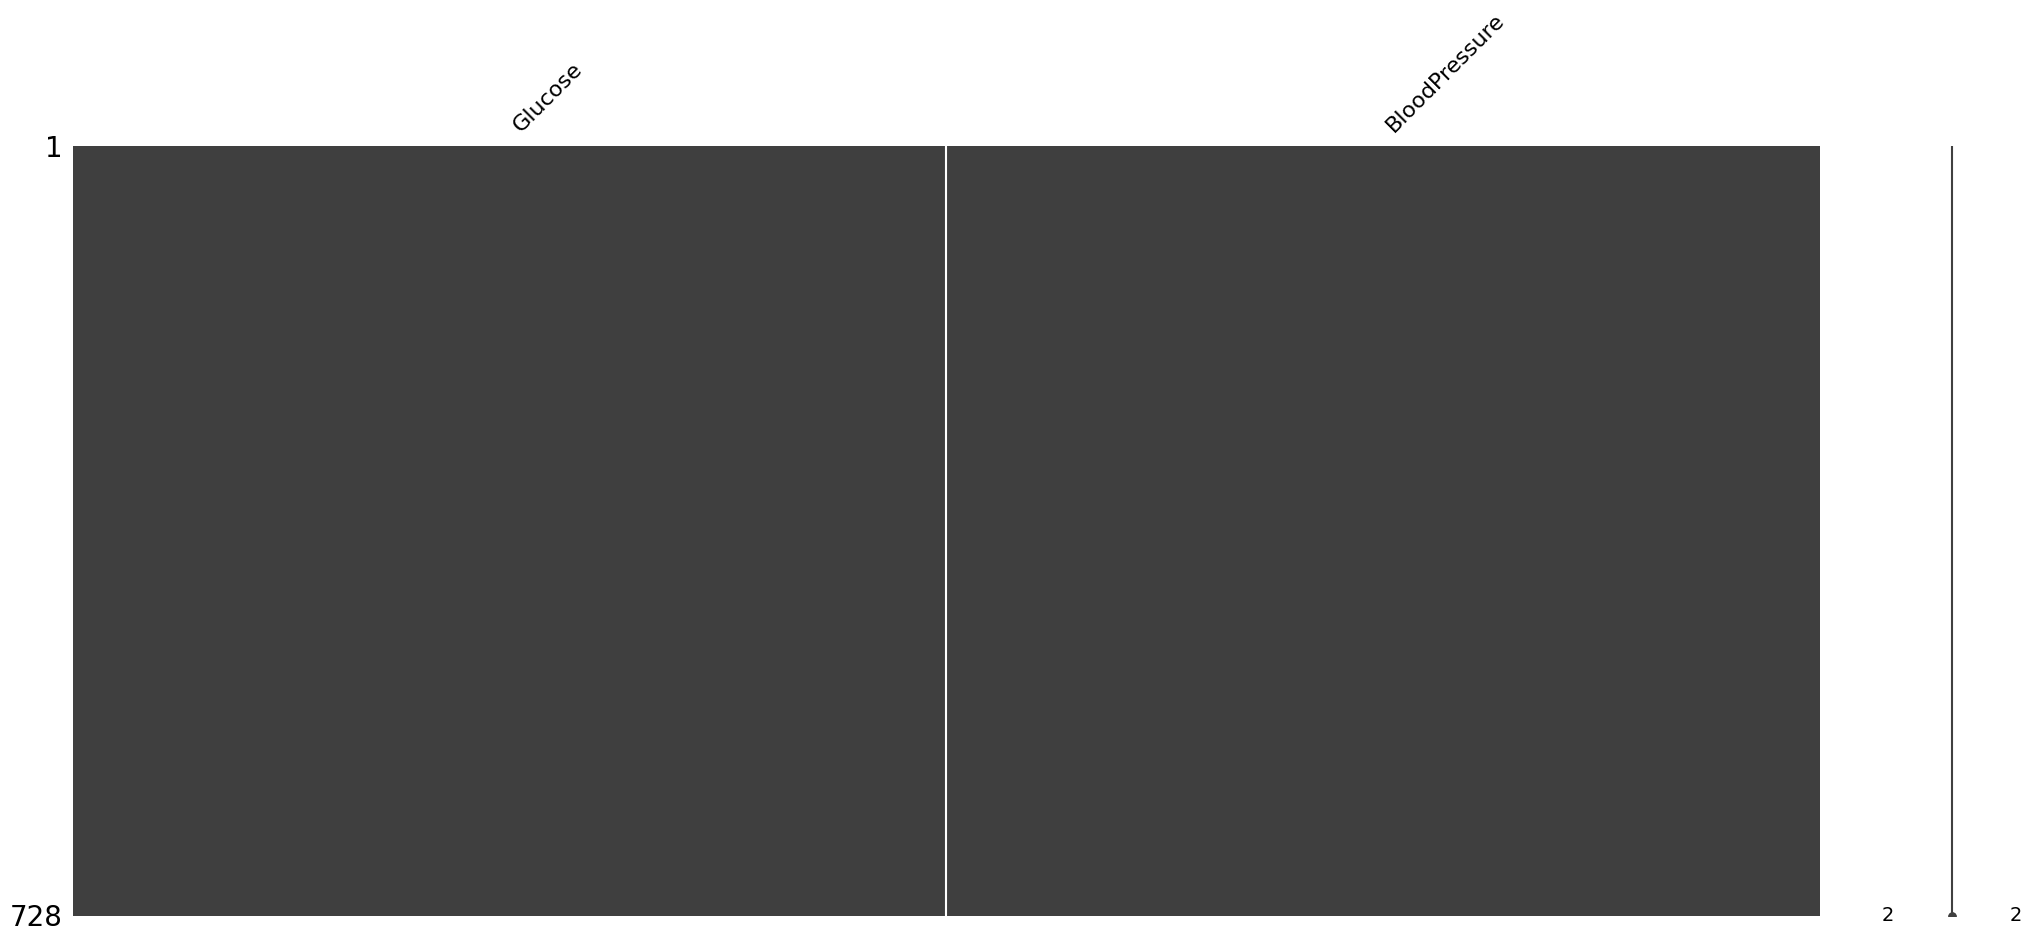

In [37]:
import missingno as msno

# Eliminación si alguna está vacía
msno.matrix(
    diabetes.dropna(subset=['Glucose', 'BloodPressure'], how='any')[['Glucose', 'BloodPressure']]
)


<Axes: >

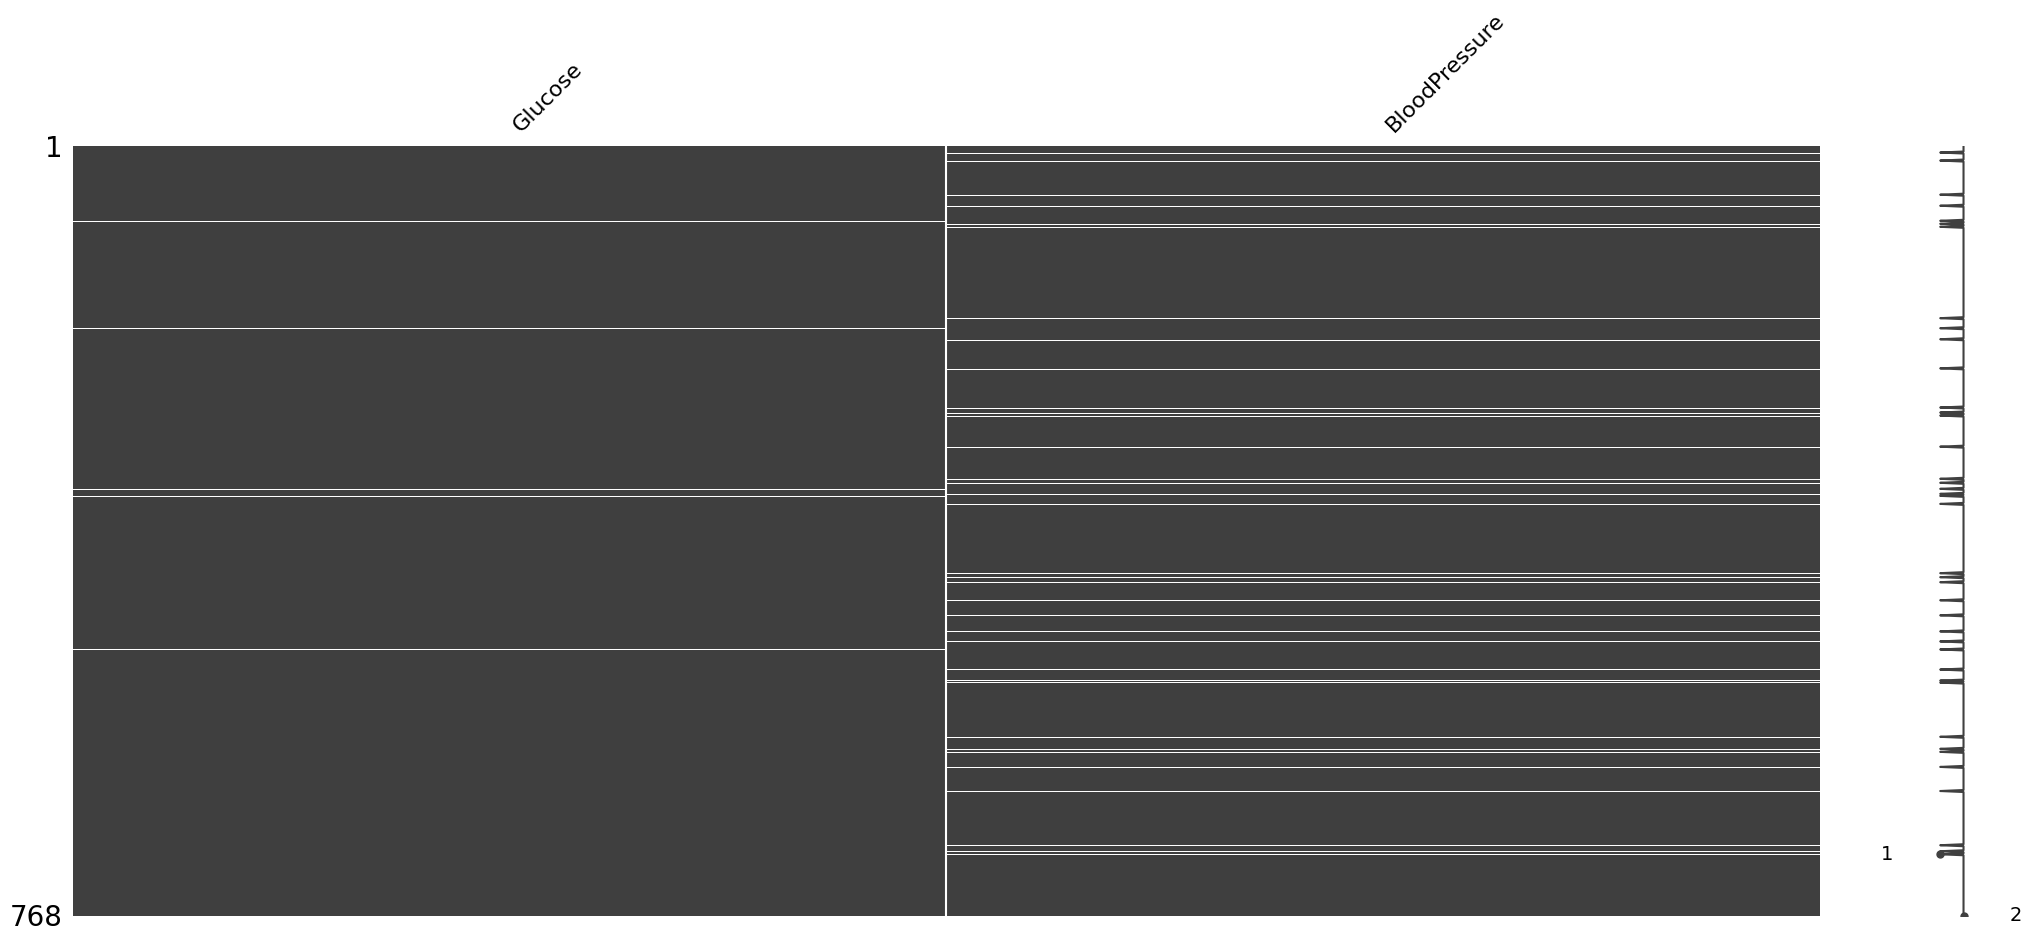

In [38]:
# Eliminación solo si ambas están vacías
msno.matrix(
    diabetes.dropna(subset=['Glucose', 'BloodPressure'], how='all')[['Glucose', 'BloodPressure']]
)
